### CLUSTERING ANALYSIS

#### Understanding and Implementing K-Means and Hierarchical Algorithms


#### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, and hierarchical and provide hands-on experience in applying these techniques to a real-world dataset.


#### Datasets:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.shape

(150, 4)

#### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

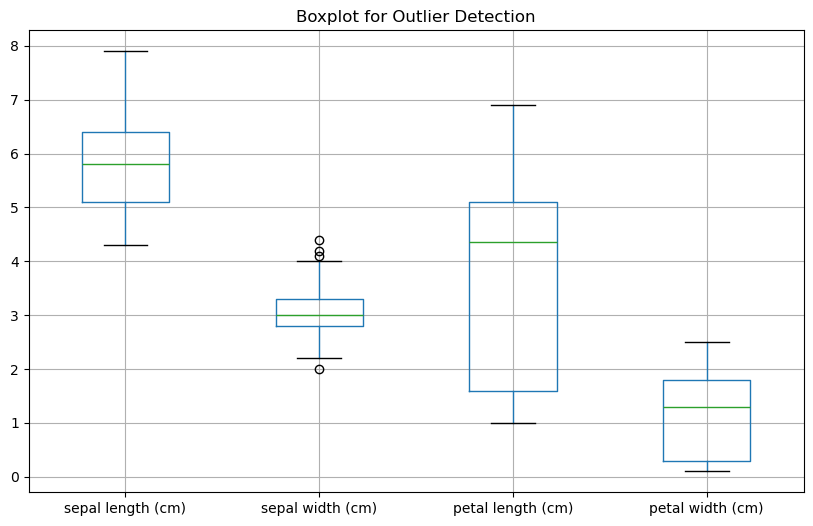

In [10]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

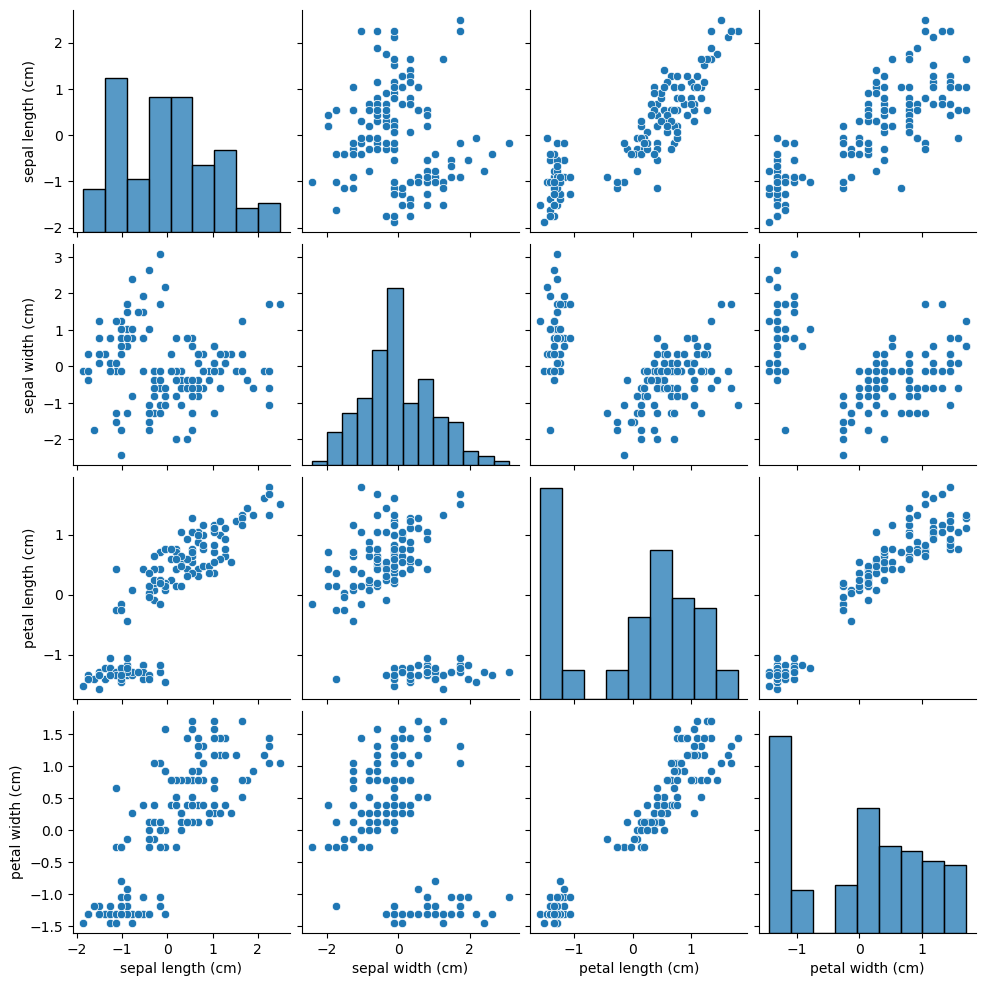

In [12]:
sns.pairplot(pd.DataFrame(scaled_data, columns=iris.feature_names))
plt.show()

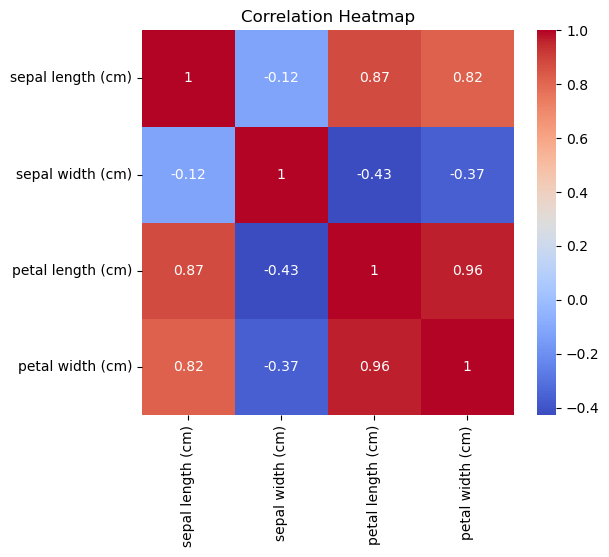

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(scaled_data, columns=iris.feature_names).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Implementing Clustering Algorithms:
•	Implement the K-Means and hierarchical algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data

•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) evaluate the clustering results.


In [17]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [18]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

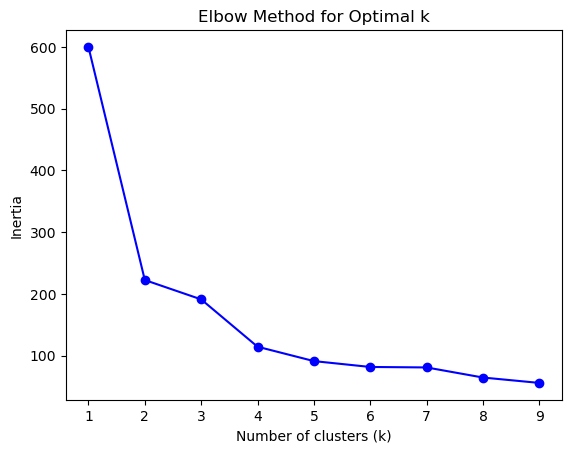

In [19]:
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [21]:
df['KMeans_Cluster'] = kmeans_labels

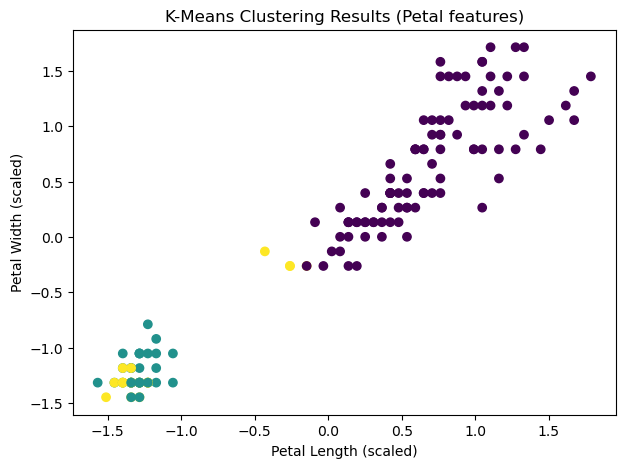

In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering Results (Petal features)")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.show()

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [25]:
Z = linkage(scaled_data, method='ward')

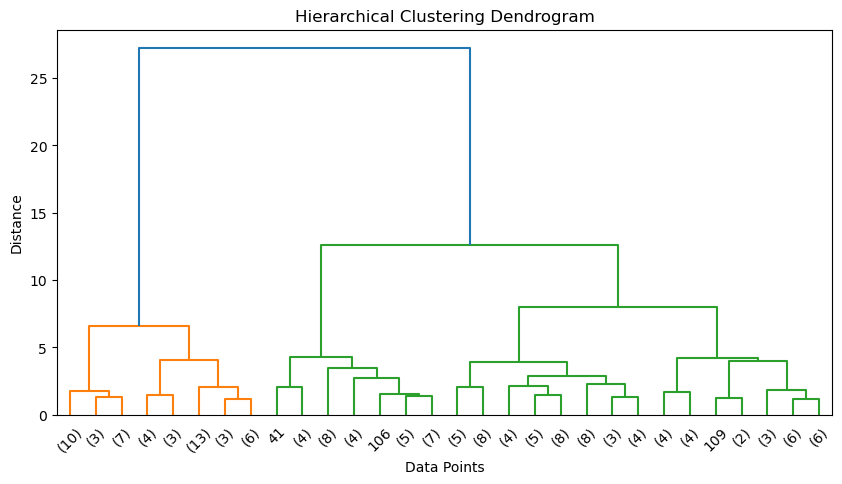

In [26]:
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [28]:
hier_labels = fcluster(Z, t=3, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

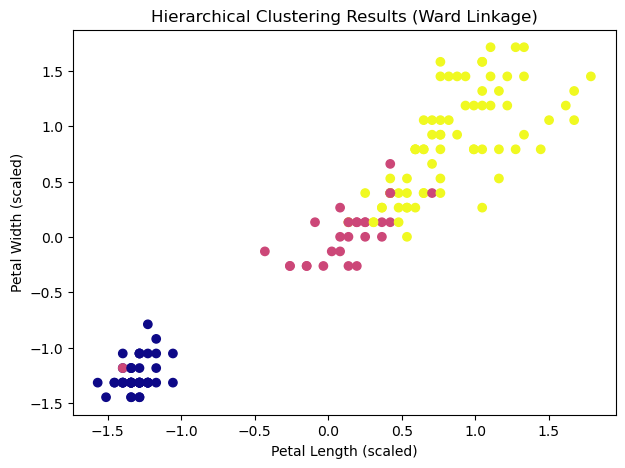

In [29]:
plt.figure(figsize=(7, 5))
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=hier_labels, cmap='plasma')
plt.title("Hierarchical Clustering Results (Ward Linkage)")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.show()

#### Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [30]:
cluster_analysis = {
    "K-Means": {
        "Optimal_Clusters": 3,
        "Cluster_Shape": "Compact, spherical",
        "Key_Insights": "Clear separation for Setosa; overlap between Versicolor and Virginica."
    },
    "Hierarchical": {
        "Optimal_Clusters": 3,
        "Cluster_Shape": "Nested hierarchy",
        "Key_Insights": "Confirms three major groups; useful for visual interpretation."
    }
}

In [31]:
for algo, details in cluster_analysis.items():
    print(f"\nAlgorithm: {algo}")
    for key, value in details.items():
        print(f"{key}: {value}")


Algorithm: K-Means
Optimal_Clusters: 3
Cluster_Shape: Compact, spherical
Key_Insights: Clear separation for Setosa; overlap between Versicolor and Virginica.

Algorithm: Hierarchical
Optimal_Clusters: 3
Cluster_Shape: Nested hierarchy
Key_Insights: Confirms three major groups; useful for visual interpretation.


#### 6. Conclusion

Through this exercise:

K-Means provided fast and efficient clustering with well-defined partitions.

Hierarchical clustering offered visual insights through dendrograms.

The optimal number of clusters (3) aligned with the true species count.

Preprocessing (especially scaling) was critical for meaningful results.

Both algorithms effectively revealed natural groupings in the data, demonstrating the importance of unsupervised learning in exploratory data analysis.